In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

import datetime as dt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs) \
.filter(extract('month', Measurement.date)==6) \
.all() 

In [5]:
#  3. Convert the June temperatures to a list 
# Skipping this because result to dataframe gives us the same result since date can be an index and it is simpler
# temps = []
# for d_result in june_results: 
#     temps.append(d_result[1])
        
# df = pd.DataFrame(temps)    
#df.describe()

<AxesSubplot:ylabel='Frequency'>

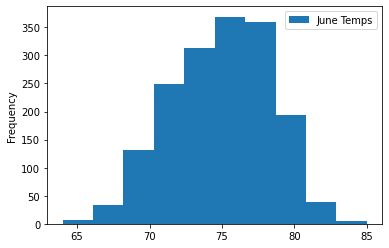

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_results, columns=['date','June Temps'])
june_temp_df.head()
june_temp_df.set_index(june_temp_df['date'], inplace=True)
june_temp_df = june_temp_df.sort_index()
# Histogram looks better than stat for temp
june_temp_df.plot.hist(bins=10)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs) \
.filter(extract('month', Measurement.date)==12) \
.all()

In [9]:
# 7. Convert the December temperatures to a list 
# Skipping this because result to dataframe gives us the same result since date can be an index and it is simpler
# temps = []
# for d_result in december_results: 
#     temps.append(d_result[1])
        
# df = pd.DataFrame(temps)    
#df.describe()

<AxesSubplot:ylabel='Frequency'>

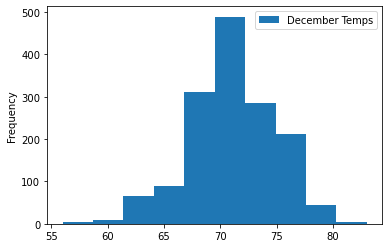

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date','December Temps'])
december_df.set_index(december_df['date'], inplace=True)
december_df = december_df.sort_index()
# Histogram looks better than stat for temp
december_df.plot.hist(bins=10)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

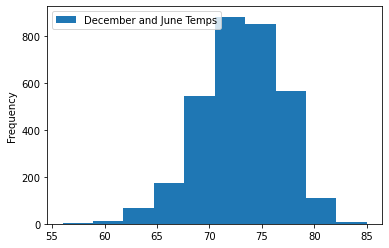

In [12]:
# The summary statistics for the June and Decemeber temperature DataFrame.
from sqlalchemy import or_

december_june_results = session.query(Measurement.date, Measurement.tobs) \
.filter(or_(extract('month', Measurement.date)==12, extract('month', Measurement.date)==6)) \
.all()

december_june_df = pd.DataFrame(december_june_results, columns=['date','December and June Temps'])
december_june_df.set_index(december_june_df['date'], inplace=True)
december_june_df = december_june_df.sort_index()
# Histogram looks better than stat for temp
december_june_df.plot.hist(bins=10)


In [13]:
december_june_df.describe()

,December and June Temps
count,3217.000000
mean,73.103823
std,4.002072
min,56.000000
25%,71.000000
50%,73.000000
75%,76.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

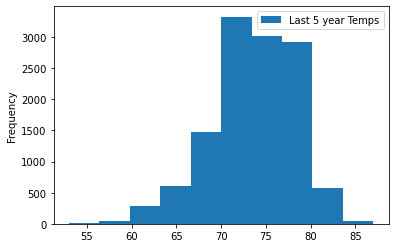

In [14]:
# The summary statistics for the last 5 years from 2017, 8, 23 temperature DataFrame.
current_year = dt.date(2017, 8, 23)
five_year_before = (current_year - pd.DateOffset(years=5)).date()

five_year_results = session.query(Measurement.date, Measurement.tobs) \
.filter(Measurement.date >= five_year_before).all()

five_year_results_df = pd.DataFrame(five_year_results, columns=['date','Last 5 year Temps'])
five_year_results_df.set_index(five_year_results_df['date'], inplace=True)
five_year_results_df = five_year_results_df.sort_index()
# Histogram looks better than stat for temp
five_year_results_df.plot.hist(bins=10)

In [15]:
five_year_results_df.describe()

,Last 5 year Temps
count,12313.000000
mean,73.508487
std,4.733521
min,53.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,87.000000
